# Steps
# 0. Preprocess + EDA(exploratory data analysis(graph vagera draw kar ke ideas lete hai))
# 1. extract input and output cols
# 2.scale the values
# 3. train test split
# 4. train the model
# 5. evaluate the model/model selection
# 6. deploy the model

In [1]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('placement.csv')

In [34]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [36]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [40]:
import matplotlib.pyplot as plt

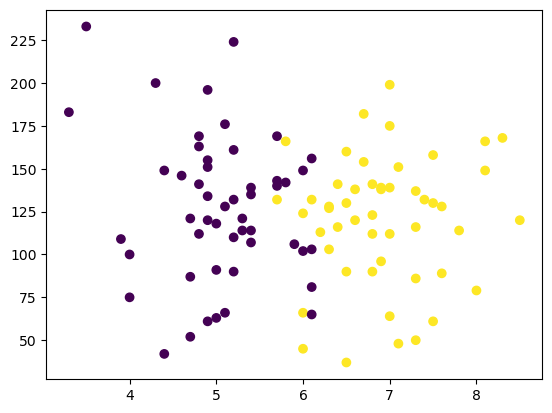

In [44]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# 1. x = df.iloc[:,0:2] (mujhe share row chayihe par columns 0 se leke 1 tak chahiye)
# y 2.= df.iloc[:,-1](mujhe share row chahiye aur last column)

In [52]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [64]:
y.shape

(100,)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_set = train_test_split(x,y,test_size=0.1)

In [68]:
x_train

,cgpa,iq
21,7.1,151.0
49,5.4,135.0
56,6.1,65.0
50,3.5,233.0
46,5.3,114.0
...,...,...
25,5.0,91.0
52,7.0,175.0
15,5.1,176.0
48,6.6,138.0


In [70]:
y_train

21    1
49    0
56    0
50    0
46    0
     ..
25    0
52    1
15    0
48    1
0     1
Name: placement, Length: 90, dtype: int64

# 0. scaling kar rhe hai -1 se 1 ke bich me 
# 1. ye karna jaruri nhi hai par kar lete hai

In [74]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [78]:
x_train = scaler.fit_transform(x_train)

In [80]:
x_train

array([[ 1.01945626,  0.7095403 ],
       [-0.47744209,  0.29638299],
       [ 0.13892782, -1.51118026],
       [-2.15044612,  2.82697154],
       [-0.56549493, -0.24588598],
       [ 0.05087498, -1.48535793],
       [-1.00575915,  0.45131698],
       [-0.21328355,  1.17434228],
       [ 0.93140341, -0.29753065],
       [-1.7101819 , -1.25295694],
       [-1.00575915,  1.01940829],
       [ 0.05087498,  0.01233734],
       [ 0.84335057,  0.37384999],
       [ 0.57919204, -0.09095199],
       [-0.21328355,  0.42549465],
       [-0.21328355,  0.21891599],
       [-0.65354777,  0.96776362],
       [-0.47744209, -0.42664231],
       [ 0.93140341, -1.53700259],
       [ 0.84335057, -0.71068796],
       [-0.9177063 , -0.09095199],
       [-1.79823474, -0.37499765],
       [ 1.28361479,  0.21891599],
       [ 1.89998469,  0.65789564],
       [-0.12523071,  0.47713931],
       [ 1.89998469,  1.09687529],
       [-0.03717787, -0.45246464],
       [ 0.93140341,  0.39967232],
       [-0.9177063 ,

In [82]:
x_test = scaler.fit_transform(x_test)

In [84]:
x_test

array([[ 0.06596439,  0.12307462],
       [-1.15908859,  2.08392446],
       [ 0.81984315, -1.54573376],
       [-0.40520983, -0.46100831],
       [ 0.25443408,  1.20780006],
       [ 1.95066129, -0.08552643],
       [ 1.00831284,  0.12307462],
       [-1.25332344, -1.21197208],
       [-1.15908859, -0.29412748],
       [-0.1225053 ,  0.0604943 ]])

In [86]:
from sklearn.linear_model import LogisticRegression

In [90]:
clf = LogisticRegression()

In [92]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [110]:
# evaluate the model/model selection
y_pred = clf.predict(x_test)

In [104]:
y_set

57    1
16    0
77    1
62    0
97    1
69    1
83    1
9     0
92    0
70    1
Name: placement, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_set,y_pred)

0.9

In [122]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 945.5 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 943.1 kB/s eta 0:00:00


In [126]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

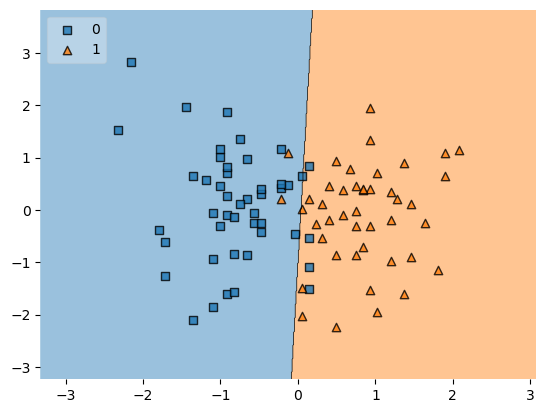

In [130]:
plot_decision_regions(x_train, y_train.values,clf=clf,legend=2)

In [132]:
import pickle

In [136]:
pickle.dump(clf,open('model.pkl','wb'))